# 머신러닝의 본질을 관통하는 철학과 과정을 깊게 파고들기

간단한 모델을 실습하며, 이면에 숨어있는 과정과 엄밀한 개념들을 전부 뜯어보자.

In [9]:
from IPython.display import display, Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

%config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.

## 맥북의 중고가를 파악해보는 예제
'사용연한'의 입력값을 넣어, '중고가격'을 출력하는 모델을 만들어본다.

먼저 'macbook.csv'를 불러오자.

In [10]:
macbook = pd.read_csv('./data/macbook.csv')
print(macbook.shape)
macbook.head()

(80, 2)


,used_years,price
0,2.65,175
1,3.80,63
2,0.95,273
3,4.50,133
4,4.45,106


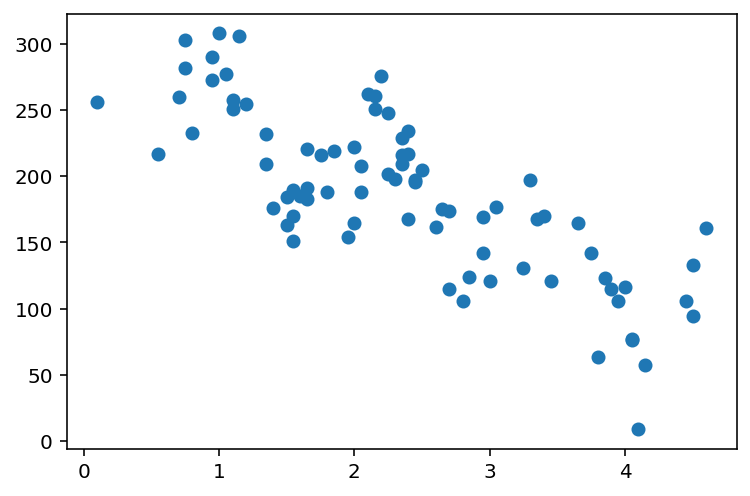

In [11]:
plt.scatter(macbook['used_years'],macbook['price'])
plt.show()

해당 데이터셋은 입력값인 '사용연한'이 증가하면, 결과값인 '중고가격'은 반대로 줄어든다.

이렇게 증가하면, 감소하거나 감소하면, 증가하는 관계를 음의 상관관계라고 한다.

지금은 음의 상관관계를 가지고 있는데
결과값들이 회귀모델 직선에 가까우면 -1에 가까워지고,
결과값들이 회귀모델 직선에서 멀면 0에 가까워진다.

계수의 값을 보기 위해서는 넘파이의 corrcoef(x,y)라는 함수를 보면 된다.

In [74]:
np.corrcoef(macbook['used_years'],macbook['price'])

array([[ 1.        , -0.78972238],
       [-0.78972238,  1.        ]])

[1,1]과 [2,2]의 위치에 존재하는 것은 자신과의 상관계수이므로 여기에선 당연히 1이 나온다.

따라서 'uesd_years'와 'price'와 위치가 교차하는 [1,2]와 [2,1]의 상관계수가 서로의 상관계수이다.

여기서는 -0.78972...의 값을 출력한다.

## 모델을 만든다는 의미

사용연수를 feature로 해서
중고가의 label을 넣어서 모델을 만든다.

이처럼 모델은 '특정 정보를 입력받아서, 그 정보에 따라 원하는 값을 예측하여 값을 출력하는 함수'라고 이해한다.

우리는 '사용연한'을 feature로 '중고가격'을 label로 넣어서 모델을 만들자.

In [88]:
X = macbook['used_years'].values
y = macbook['price'].values

## 일차함수 모델 만들기

In [32]:
def model(x,w,b):
  y = w * x + b
  return y

model(x=5, w=2, b=1)

11

1차 함수 모델을 만들었다.

그럼 최적화된 weight(기울기)와 bias(절편)을 훈련시키는지 보자.

모델을 학습시킨다는 건 입력받은 train dataset에서 정답값에 가까운 출력을 낼 수 있는 최적의 매개변수(w,b)를 찾는 것이다.
즉 방정식을 풀여야 한다.

사용연수가 2년인 맥북의 중고가: 100만 원 -> 100 = w * 2 + b
사용연수가 5년인 맥북의 중고가: 40만 원 -> 40 = w * 5 + b

이 두 식을 연립방정식으로 풀면 w = -20, b = 140을 쉽게 알 수 있다.

6년이 된 맥북의 가격은 위 식을 통해 예측할 수 있는데, 20만원이다.

(2, 100), (5, 40), (6, 20) 세 가지 점을 그래프로 그려보면 다음과 같습니다.

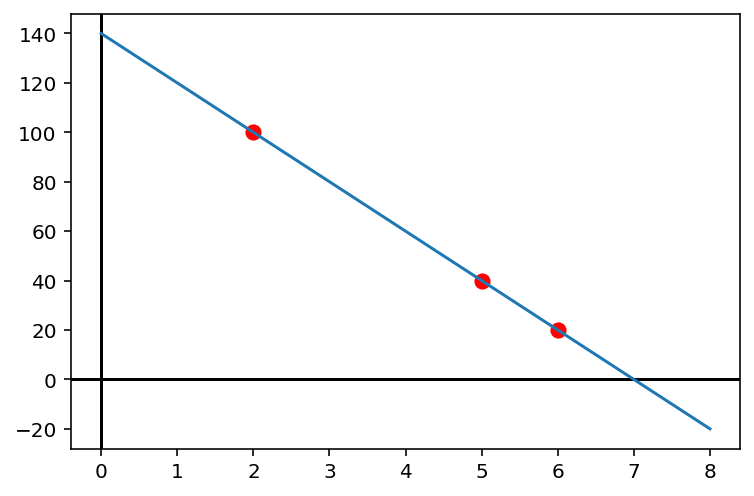

In [90]:
# x축, y축 그리기
plt.axvline(x=0, c='black')
plt.axhline(y=0, c='black')

# y = wx + b 일차함수 그리기
x = np.linspace(0, 8, 9)
y = model(x, w=-20, b=140) # y = -20x + 140
plt.plot(y)

# 나의 (x, y) 점 찍기
x_data = [2, 5, 6]
y_data = [100, 40, 20]
plt.scatter(x_data, y_data, c='r', s=50)

plt.show()

모두 일직선 모델의 방정식에 들어간다.

하지만 실제 데이터 셋은 2개로 예측해서 찍어내지 못하는 경우가 많다.

맥북의 중고가 데이터도 직선위에 모든 데이터가 위치하지 않는다.

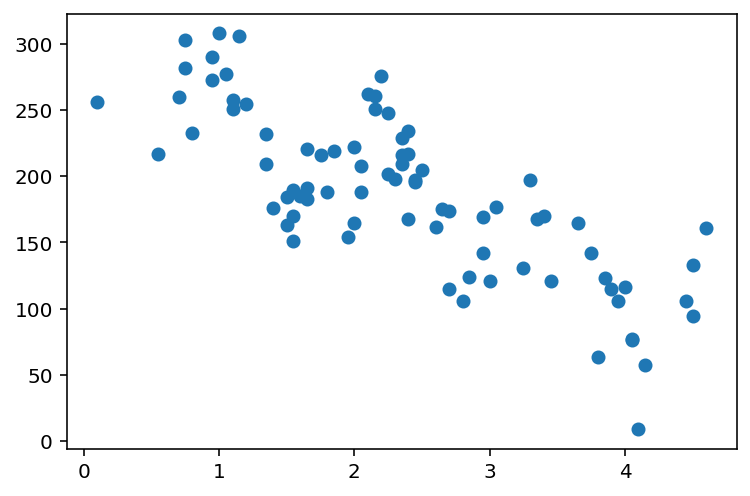

In [78]:
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

## 정답이 아닌 최적의 방정식을 구하는 여정
앞서 데이터를 들여다 본 것과 같이, 데이터는 하나의 모델에 정확하게 일치하지 않는다.
모델과 데이터간의 오차가 있는데 이러한 오차의 합들을 나타낸 함수가 손실함수다.
이러한 함수가 최소값을 같도록 하면 최적의 함수를 찾을 수 있지 않을까?

불완전한 임의의 모델을 만들어보자.

In [4]:
w = 3.1
b = 2.3

x = np.linspace(0,5,6)
y = model(x,w,b)
plt.plot(y, c= 'r')

plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

NameError: name 'np' is not defined

직선은 전혀 맞지 않네요. 더 좋은 w,b를 찾아야 합니다.

그러기 위해선 지금의 used_years를 x로 가져와서 실제 label값과 모델의 측정값의 오차를 비교해 확인해보자.

In [80]:
x = macbook["used_years"].values
print(x)

prediction = model(x,w,b)
print(prediction)

macbook['prediction'] = prediction
macbook.head()

[2.65 3.8  0.95 4.5  4.45 2.7  3.05 2.25 2.3  1.85 1.5  0.95 2.6  0.55
 2.05 0.75 3.95 2.8  2.05 1.15 1.35 3.35 1.35 2.45 2.4  0.1  3.45 2.35
 0.7  1.05 1.75 4.1  4.5  4.   2.   2.45 2.5  2.1  3.   4.05 2.7  2.15
 3.3  2.4  2.85 1.65 1.55 2.15 3.4  1.55 0.8  2.95 2.4  1.4  1.65 2.25
 3.85 3.9  4.6  2.35 4.05 1.2  1.95 1.6  2.   1.8  3.75 3.65 2.35 2.2
 1.   4.15 1.1  1.55 2.95 1.5  1.65 1.1  3.25 0.75]
[10.515 14.08   5.245 16.25  16.095 10.67  11.755  9.275  9.43   8.035
  6.95   5.245 10.36   4.005  8.655  4.625 14.545 10.98   8.655  5.865
  6.485 12.685  6.485  9.895  9.74   2.61  12.995  9.585  4.47   5.555
  7.725 15.01  16.25  14.7    8.5    9.895 10.05   8.81  11.6   14.855
 10.67   8.965 12.53   9.74  11.135  7.415  7.105  8.965 12.84   7.105
  4.78  11.445  9.74   6.64   7.415  9.275 14.235 14.39  16.56   9.585
 14.855  6.02   8.345  7.26   8.5    7.88  13.925 13.615  9.585  9.12
  5.4   15.165  5.71   7.105 11.445  6.95   7.415  5.71  12.375  4.625]


,used_years,price,prediction
0,2.65,175,10.515
1,3.80,63,14.080
2,0.95,273,5.245
3,4.50,133,16.250
4,4.45,106,16.095


price와 prediction의 값이 매추 큰 차이를 보인다.

오차 항목을 만들어서 입력해보자.

In [81]:
macbook['error'] = macbook['price']- macbook['prediction']
macbook.head()

,used_years,price,prediction,error
0,2.65,175,10.515,164.485
1,3.80,63,14.080,48.920
2,0.95,273,5.245,267.755
3,4.50,133,16.250,116.750
4,4.45,106,16.095,89.905


회귀모델의 예측값의 오차를 평가하는 모델이 여러가지 있다.

대표적으로는 MAE, MSE, RMSE, R-squared 등이 있으며
MAE는 입력값을 예측값으로 빼서 절대값한 크기만 합치고, 데이터의 개수(크기)로 나눠준 값으로 평가하고
MSE는 입력값에서 에측값과의 차를 제곱해서 합치고, 데이터의 개수로 나눠준 값으로 평가한다.
RMSE는 MSE의 제곱근이다.
R-squared는 1 - ((sum(입력값 - 예측값) **2) /(sum(입력값 - 평균값) ** 2)), 결정계수라 한다.

이번 평가에선 가장 많이 쓰는 RMSE 평가모델을 사용한다.

In [19]:
def RMSE(a,b):
  mse = ((a-b) **2).mean()
  rmse = mse**0.5
  return rmse

x = macbook["used_years"].values
y = macbook["price"].values

rmse = RMSE(prediction, y)
print(rmse)

NameError: name 'prediction' is not defined

부정확하기에 RMSE가 매우 크다. 오차의 합을 줄이면 되는 데 어떻게 줄일까요?

그럼 우리는 이제 RMSE 평가모델을 통해 오차의 합을 구하는 방정식인 손실함수(비용함수)를 구해보자.

In [21]:
def loss(x,w,b,y):
  prediction = model(x,w,b)
  L = RMSE(prediction,y)
  return L

모델에 입력되는 4가지 중 우리가 변화시킬 수 있는 값은 w와 b이다.
이들을 파라미터와 가중치라고 한다.

이러한 가중치의 최소값을 구하기 위해서 gradient(기울기)가 0이 되는 최적의 가중치 값을 찾아낸다.

규칙을 통해서 하나씩 0에 가깝게 찾아볼 수 있다.

1. 현재 w에서의 기울기를 구한다.
2. 기울기가 음수라면 w를 키운다.
3. 기울기가 양수라면 w를 줄인다.

수식으로 나타내면 

w' =w−ηg

η : 얼마나 업데이트를 할 지를 결정하는 상수(학습률)
g : 기울기 또는 그래디언트

기울기는 텐서플로우를 이용해서 미분을 구하자.

In [6]:
LEARNING_RATE = 1

In [12]:
x = macbook["used_years"].values
y = macbook["price"].values

슝=3


In [2]:
def gradient(x, w, b, y):
    dw = (loss(x, w + 0.0001, b, y) - loss(x, w, b, y)) / 0.0001
    db = (loss(x, w, b + 0.0001, y) - loss(x, w, b, y)) / 0.0001
    return dw, db

In [23]:
losses = []

In [24]:
for i in range(1, 2001):
    dw, db = gradient(x, w, b, y)   # 3, 4번: 모델이 prediction을 예측하고, 손실함수값을 계산함과 동시에 기울기 계산
    w -= LEARNING_RATE * dw         # 5번: w = w - η * dw 로 업데이트
    b -= LEARNING_RATE * db         # 5번: b = b - η * db 로 업데이트 
    L = loss(x, w, b, y)            # 현재의 loss 값 계산
    losses.append(L)                # loss 값 기록
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 107.8708
Iteration 200 : Loss 94.4397
Iteration 300 : Loss 81.7335
Iteration 400 : Loss 70.0698
Iteration 500 : Loss 59.8849
Iteration 600 : Loss 51.6766
Iteration 700 : Loss 45.7883
Iteration 800 : Loss 42.1201
Iteration 900 : Loss 40.1217
Iteration 1000 : Loss 39.1354
Iteration 1100 : Loss 38.6763
Iteration 1200 : Loss 38.4689
Iteration 1300 : Loss 38.3766
Iteration 1400 : Loss 38.3358
Iteration 1500 : Loss 38.3178
Iteration 1600 : Loss 38.3098
Iteration 1700 : Loss 38.3063
Iteration 1800 : Loss 38.3048
Iteration 1900 : Loss 38.3041
Iteration 2000 : Loss 38.3038


반복이 증가하면서 Loss 값이 줄어들고 있다.

그래프로 확인해보자.

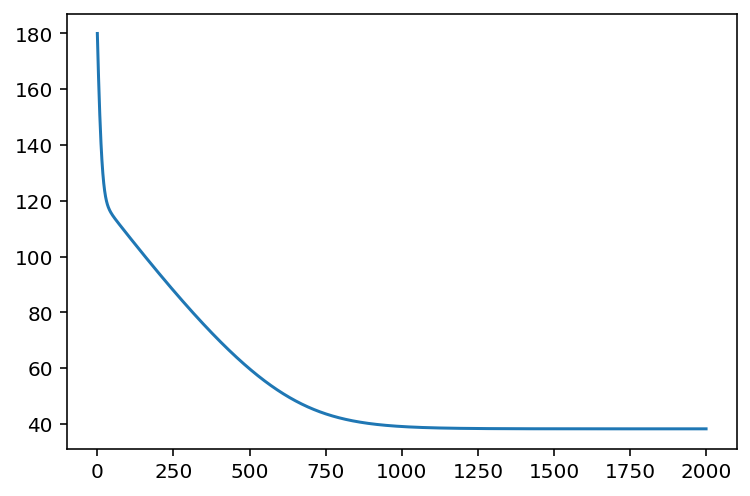

In [26]:
plt.plot(losses)
plt.show()

In [27]:
print(w,b)

-44.92802735596856 293.082887486003


학습데이터와 학습완료된 모델의 일차함수를 함께 그려보자.

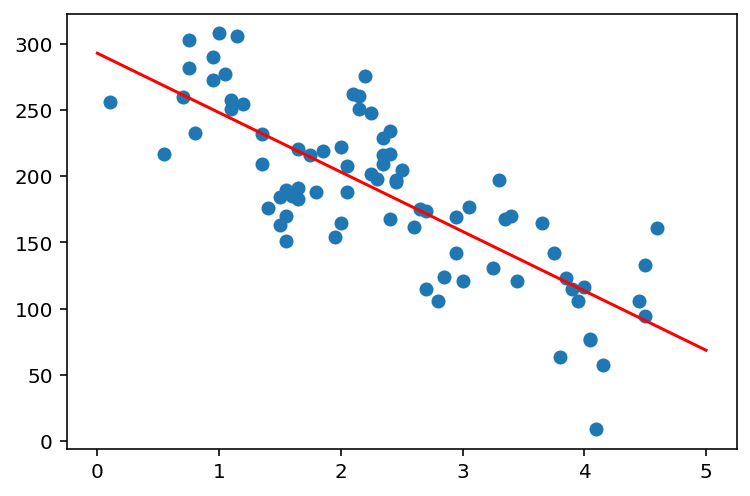

In [28]:
x = np.linspace(0,5,6)

y = model(x,w,b)

plt.plot(y, c='r')

plt.scatter(macbook['used_years'],macbook['price'])
plt.show()

이제 테스트셋인 macbook_test.csv를 가져와서 평가해보자

In [30]:
test = pd.read_csv("./data/macbook_test.csv")
print(test.shape)
test.head()

(20, 2)


,used_years,price
0,1.20,203
1,1.85,206
2,2.40,191
3,2.85,164
4,3.05,176


데이터를 test_X와 test_y로 분리해 담아주자.

In [35]:
test_X = test['used_years'].values
test_y = test['price'].values

이제 모델에 넣어 예측값을 구해서 손실함수를 구하자

In [55]:
prediction = model(test_X,w,b)
test['prediction'] = prediction
test.head()

,used_years,price,prediction
0,1.20,203,239.169255
1,1.85,206,209.966037
2,2.40,191,185.255622
3,2.85,164,165.038010
4,3.05,176,156.052404


error 칼럼을 추가해, 실제값과 예측값의 차를 넣어보자.

In [56]:
test['error'] = test['price'] - test['prediction']
test.head()

,used_years,price,prediction,error
0,1.20,203,239.169255,-36.169255
1,1.85,206,209.966037,-3.966037
2,2.40,191,185.255622,5.744378
3,2.85,164,165.038010,-1.038010
4,3.05,176,156.052404,19.947596


error값도 구했겠다. rmse값도 구해보자.

In [58]:
rmse = ((test['error']**2).sum() / len(test)) ** 0.5
print(rmse)

45.039281182770374


일차함수를 그리고

실제 데이터 값을 찍고,
모델이 예측한 값을 찍어보자.

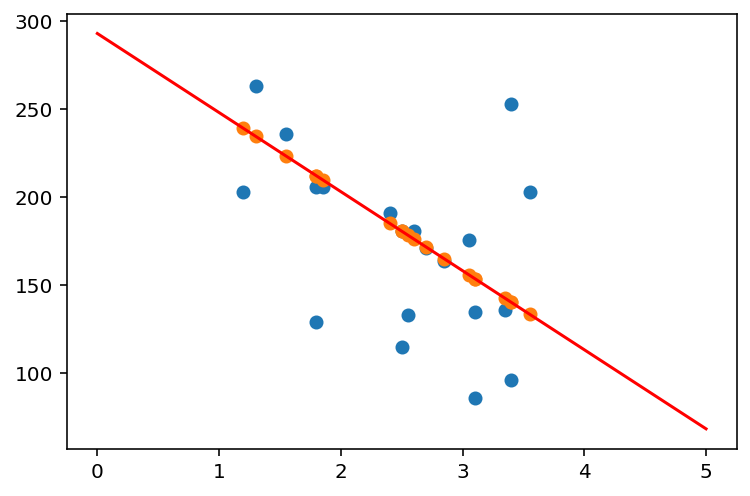

In [65]:
x = np.linspace(0,5,6)
y = model(x,w,b)
plt.plot(y, c='r')

plt.scatter(test['used_years'], test['price'])

plt.scatter(test['used_years'], test['prediction'])
plt.show()

np.linspace()함수에 파라미터에 대해 알아보자.

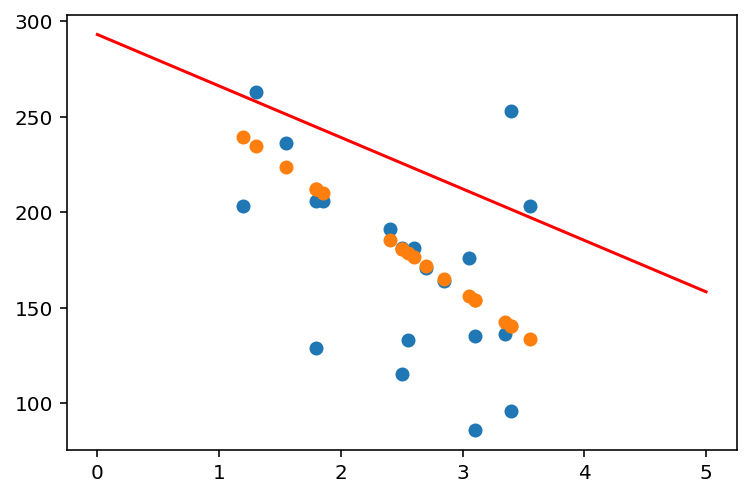

In [66]:
x = np.linspace(0,3,6)
y = model(x,w,b)
plt.plot(y, c='r')

plt.scatter(test['used_years'], test['price'])

plt.scatter(test['used_years'], test['prediction'])
plt.show()

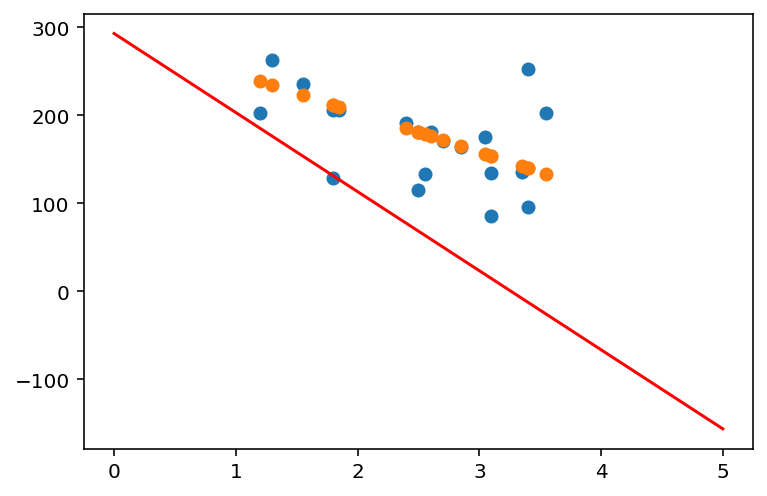

In [67]:
x = np.linspace(0,10,6)
y = model(x,w,b)
plt.plot(y, c='r')

plt.scatter(test['used_years'], test['price'])

plt.scatter(test['used_years'], test['prediction'])
plt.show()

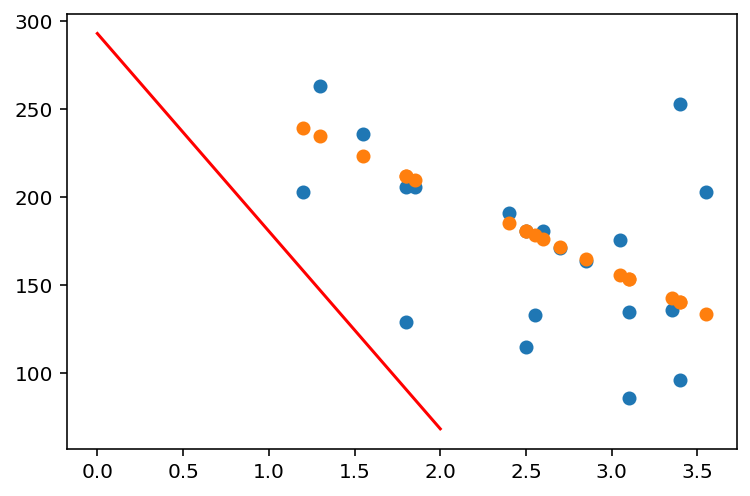

In [68]:
x = np.linspace(0,5,3)
y = model(x,w,b)
plt.plot(y, c='r')

plt.scatter(test['used_years'], test['price'])

plt.scatter(test['used_years'], test['prediction'])
plt.show()

파라미터의 값에 따라서 일차함수 그래프가 바뀐다.

## 단일 파라미터가 아닌 다변수 선형회귀 분석법

손님의 성별, 수, 전체 먹은 금액 등으로 내가 받을 팁을 예측할 수 있을까?

seaborn의 데이터셋을 이용한 예제를 풀어보자.

In [69]:
import seaborn as sns

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [71]:
tips = sns.load_dataset('tips')
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [72]:
tips = pd.get_dummies(tips, columns=['sex','smoker','day','time'])
tips.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


다른 변수들을 통해 tip의 값을 최종적으로 예측하고자 맨 오른쪽으로 이동시키자.

In [73]:
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
tips.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,tip
0,16.99,2,0,1,0,1,0,0,0,1,0,1,1.01
1,10.34,3,1,0,0,1,0,0,0,1,0,1,1.66
2,21.01,3,1,0,0,1,0,0,0,1,0,1,3.50
3,23.68,2,1,0,0,1,0,0,0,1,0,1,3.31
4,24.59,4,0,1,0,1,0,0,0,1,0,1,3.61


## 다변수 선형회귀에 대한 데이터 전처리

In [74]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(195, 12) (195,)
(49, 12) (49,)


12개의 W 백터와 1개의 B가 필요하다.

In [76]:
W = np.random.rand(12)
b = np.random.rand()

def model(X,W,b):
  prediction = 0
  for i in range(12):
    prediction += X[:,i] * W[i]
  prediction += b
  return prediction

def MSE(a,b):
  mse = ((a-b)**2).mean()
  return mse

def loss(X,W,b,y):
  prediction = model(X, W, b)
  L = MSE(prediction, y)
  return L

이번에는 RMSE가 아닌 MSE로 로스함수까지 만들었다.

In [78]:
def gradient(X, W, b, y):
  N = len(W)

  y_pred = model(X,W,b)

  dW = 1/N * 2 *X.T.dot(y_pred - y)

  db = 2 * (y_pred - y).mean()
  return dW, db

dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [5585.94438781  683.64312797  169.49554079   81.38741044   96.83647221
  154.04647902   58.67812912   17.21921145   87.54061625   87.44499442
   62.6332609   188.24969033]
db: 12.338505798211333


여기서 dW를 계산할 때, X의 전치행렬(Transpose)를 변환시켜 y의 오차백터와 내적시켰다. 따라서 x1과 오차 백터의 1열과 내적되어 w1이 되고, x2는 오차백터 2열과 내적되어 w2를 갖도록 만들었다.

이제 반복해서 가중치 학습을 진행시키자.

이번에는 학습률은 0.0001로 한다.

In [79]:
LEARNING_RATE = 0.0001

losses = []

for i in range(1,1001):
  dW, db = gradient(X_train, W, b, y_train)
  W -= LEARNING_RATE * dW
  b -= LEARNING_RATE * db
  L = loss(X_train, W,b,y_train)
  losses.append(L)
  if i % 10 == 0:
    print("Iteration %d : Loss %0.4f" % (i, L))


Iteration 10 : Loss 2.0017
Iteration 20 : Loss 1.9737
Iteration 30 : Loss 1.9487
Iteration 40 : Loss 1.9251
Iteration 50 : Loss 1.9026
Iteration 60 : Loss 1.8813
Iteration 70 : Loss 1.8611
Iteration 80 : Loss 1.8418
Iteration 90 : Loss 1.8235
Iteration 100 : Loss 1.8061
Iteration 110 : Loss 1.7895
Iteration 120 : Loss 1.7736
Iteration 130 : Loss 1.7585
Iteration 140 : Loss 1.7440
Iteration 150 : Loss 1.7302
Iteration 160 : Loss 1.7170
Iteration 170 : Loss 1.7044
Iteration 180 : Loss 1.6923
Iteration 190 : Loss 1.6806
Iteration 200 : Loss 1.6695
Iteration 210 : Loss 1.6588
Iteration 220 : Loss 1.6485
Iteration 230 : Loss 1.6385
Iteration 240 : Loss 1.6290
Iteration 250 : Loss 1.6198
Iteration 260 : Loss 1.6109
Iteration 270 : Loss 1.6024
Iteration 280 : Loss 1.5941
Iteration 290 : Loss 1.5861
Iteration 300 : Loss 1.5783
Iteration 310 : Loss 1.5708
Iteration 320 : Loss 1.5636
Iteration 330 : Loss 1.5565
Iteration 340 : Loss 1.5497
Iteration 350 : Loss 1.5431
Iteration 360 : Loss 1.5366
I

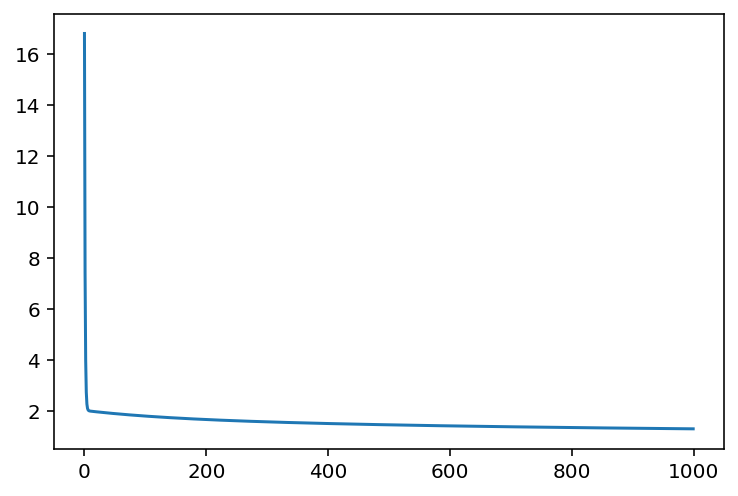

[ 0.08138794 -0.14410836  0.48056686  0.4243995  -0.04634424  0.02264205
  0.53549697  0.40056551  0.10915909  0.5696432   0.16645326  0.38603155] 0.7752047368645506


In [81]:
plt.plot(losses)
plt.show()

print(W,b)

경사하강법을 1000번 반복하고 있다.
반복이 증가하면서 loss함수는 0에 가까워지고 있다.

W,b의 값이 구해졌다.

테스트 셋의 데이터를 넣어서 mse(loss)값을 구하자.

In [82]:
prediction = model(X_test, W,b)
mse = loss(X_test, W,b, y_test)
mse

0.7751981919168823

아주 작은 값으로 수렴한 듯하다.
실제 데이터 셋과 예측 데이터셋을 시각화해보자.

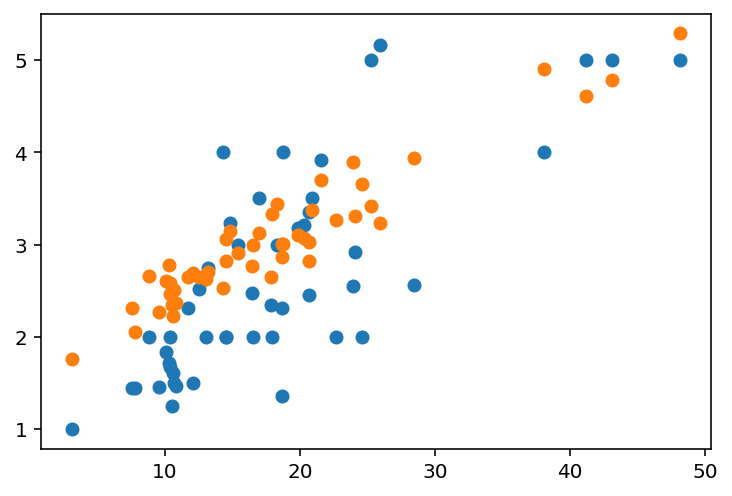

In [83]:
plt.scatter(X_test[:,0], y_test)
plt.scatter(X_test[:,0], prediction)
plt.show()